import pandas as pd

products_df = pd.read_csv('/Users/zhangjiaqing/Desktop/takehome/PRODUCTS_TAKEHOME.csv')
transactions_df = pd.read_csv('/Users/zhangjiaqing/Desktop/takehome/TRANSACTION_TAKEHOME.csv')
users_df = pd.read_csv('/Users/zhangjiaqing/Desktop/takehome/USER_TAKEHOME.csv')

products_df.head(), transactions_df.head(), users_df.head()

In [ ]:
## PRODUCT TABLE

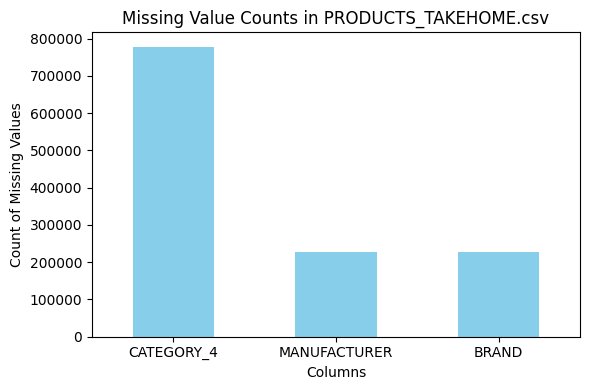

In [12]:
import matplotlib.pyplot as plt

# Counting the missing values in the relevant columns for the PRODUCTS_TAKEHOME.csv
products_missing_counts = products_df[['CATEGORY_4', 'MANUFACTURER', 'BRAND']].isnull().sum()

# Plotting the missing value counts
plt.figure(figsize=(6, 4))
products_missing_counts.plot(kind='bar', color='skyblue')
plt.title("Missing Value Counts in PRODUCTS_TAKEHOME.csv")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
## USER TABLE

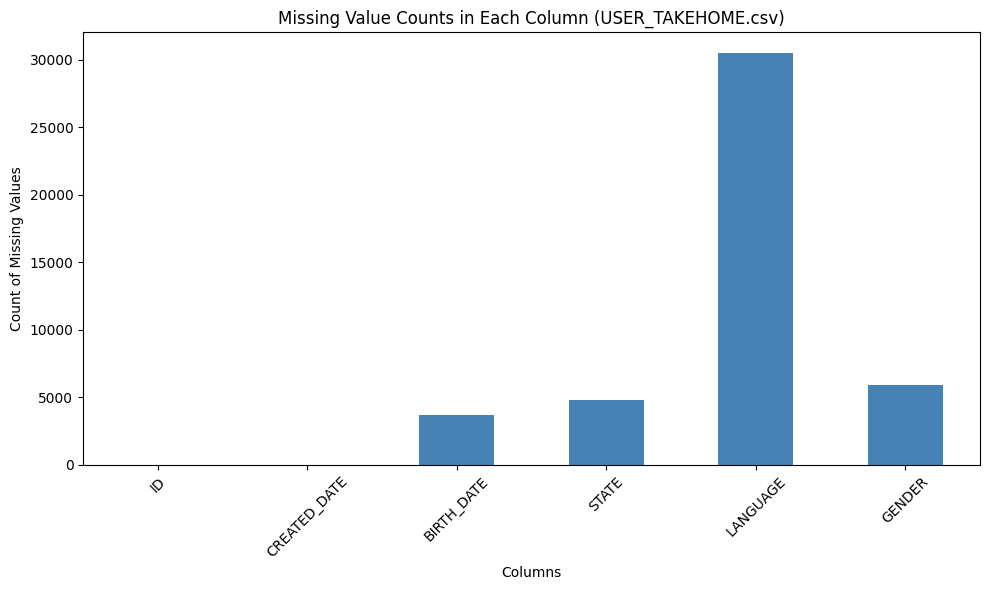

In [16]:
# missing values in each column in the USER_TAKEHOME.csv
users_missing_counts_all = users_df.isnull().sum()

# Plotting the missing value counts for all columns
plt.figure(figsize=(10, 6))
users_missing_counts_all.plot(kind='bar', color='steelblue')
plt.title("Missing Value Counts in Each Column (USER_TAKEHOME.csv)")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
## TRANSACTION TABLE

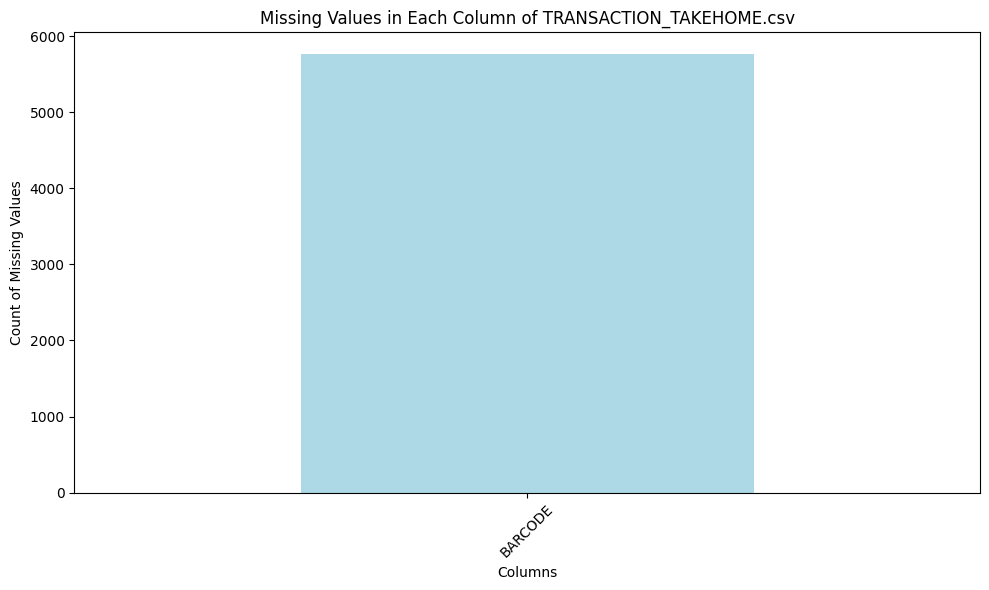

In [18]:
transaction_missing_values = transactions_df.isnull().sum()

# Filter out columns that have no missing values
transaction_missing_values = transaction_missing_values[transaction_missing_values > 0]

# Plotting missing values for each column
plt.figure(figsize=(10, 6))
transaction_missing_values.plot(kind='bar', color='lightblue')
plt.title("Missing Values in Each Column of TRANSACTION_TAKEHOME.csv")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

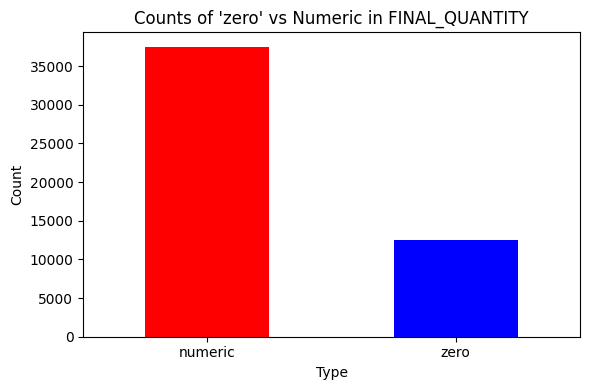

In [21]:
# Create a new column to categorize values as 'zero' or 'numeric'
transactions_df['Quantity_Type'] = transactions_df['FINAL_QUANTITY'].apply(lambda x: 'zero' if x == 'zero' else 'numeric')

# Count the occurrences of 'zero' and 'numeric' in the FINAL_QUANTITY column
quantity_type_counts = transactions_df['Quantity_Type'].value_counts()

# Plot the results
plt.figure(figsize=(6, 4))
quantity_type_counts.plot(kind='bar', color=['red', 'blue'])
plt.title("Counts of 'zero' vs Numeric in FINAL_QUANTITY")
plt.ylabel("Count")
plt.xlabel("Type")
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
## Q2  Fields with potential ambiguity:
## LANGUAGE: Values like "en" (English) and "es-419" (Latin American Spanish) represent language codes. If this column is used for analytics, the codes might need to be clarified or standardized.

## FINAL_QUANTITY and FINAL_SALE: The inconsistent entries ("zero" or empty) may require cleaning, and a clear understanding of whether zero means no sale or simply missing data is necessary.

## CATEGORY Levels: Clarifying how the product categories (e.g., CATEGORY_1, CATEGORY_2) are structured hierarchically will be important for ensuring accurate grouping in product analyses.

## BARCODE: It’s possible that BARCODE serves as a unique identifier for products across datasets. If it's missing, matching products between transactions and the product dataset will become challenging.

## SCAN_DATE vs PURCHASE_DATE: The difference between these fields may be important. PURCHASE_DATE likely refers to the actual transaction date, while SCAN_DATE could indicate when the transaction was recorded into the system. Clarifying their definitions is crucial for accurate analysis of transaction timing. 
## Dates in fields like CREATED_DATE and BIRTH_DATE have time zones (denoted by "Z").